### Feature Scaling

Feature scaling is a crucial preprocessing step in machine learning that ensures all features contribute equally to the model. Without scaling, features with larger ranges can dominate the learning process, leading to biased results.

---

#### Key Methods for Feature Scaling

1. **Standardization**
   - Transforms features to have a mean of 0 and a standard deviation of 1.
   - Formula:  
     $$ Z = \frac{X - \mu}{\sigma} $$  
     Where:  
     - $ X $: Original value,  
     - $ \mu $: Mean of the feature,  
     - $ \sigma $: Standard deviation of the feature.  

   - This method preserves the distribution of the data, making it suitable for algorithms that assume normal distribution (e.g., SVM, logistic regression, and PCA).

   **Use Case**:  
   - Standardization is effective when features have different scales and distributions but are approximately normal.

---

2. **Normalization**
   - Rescales the data to a range of [0, 1] (or -1 to 1 in some cases).
   - Formula:  
     $$ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$  
     Where:  
     - $ X $: Original value,  
     - $ X_{\text{min}} $: Minimum value of the feature,  
     - $ X_{\text{max}} $: Maximum value of the feature.  

   - Normalization ensures all features are on the same scale without assuming any distribution.

   **Use Case**:  
   - Ideal for algorithms sensitive to magnitudes (e.g., KNN, neural networks) or when features have varying ranges.

---

#### Considerations
- **When to Use Standardization**:
  - When data is normally distributed.
  - For algorithms sensitive to feature distribution assumptions (e.g., linear regression, SVM).
  
- **When to Use Normalization**:
  - When data does not follow a normal distribution.
  - For distance-based algorithms like KNN or clustering.

Feature scaling improves model performance, speeds up convergence in gradient-based algorithms, and ensures that all features are treated equally during the learning process.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
loan_data = pd.read_csv('loan.csv')
loan_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### Lets work on `loan['ApplicantIncome']`

In [50]:
loan_data['ApplicantIncome'].isnull().sum()

0

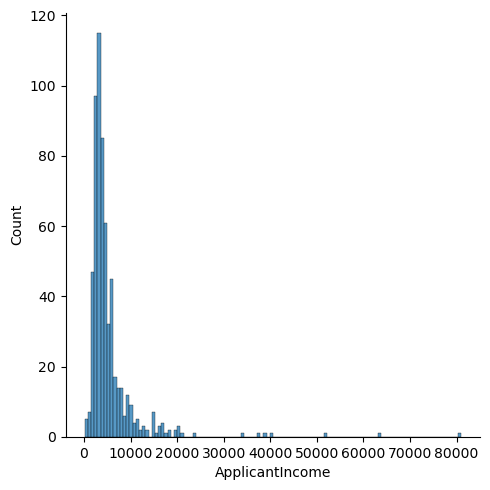

In [51]:
sns.displot(loan_data['ApplicantIncome'])
plt.show()

### 1. Standardization

Standardization is a feature scaling technique that transforms data to have a mean of 0 and a standard deviation of 1. This ensures that features are on a comparable scale, regardless of their original ranges.

---

#### Process:

1. **Using `StandardScaler`**:
   - The `StandardScaler` from scikit-learn is applied to the `ApplicantIncome` column of the dataset.  
   - It computes the mean and standard deviation of the column and scales each value using the formula:  
     $$ Z = \frac{X - \mu}{\sigma} $$  
     Where:  
     - $ X $: Original value,  
     - $ \mu $: Mean of the feature,  
     - $ \sigma $: Standard deviation of the feature.

2. **Visualization**:
   - The distribution of `ApplicantIncome` before and after standardization is visualized using histograms with kernel density estimation (KDE).  
   - The plot on the left shows the original data, which may have a skewed or uneven distribution.  
   - The plot on the right shows the standardized data, which has a mean of 0 and is scaled to have unit variance.

3. **Impact**:
   - Standardization does not change the shape of the distribution but adjusts its scale and centering.  
   - Algorithms sensitive to feature magnitude, like SVM and PCA, benefit from standardization.  

#### Benefits:
- Standardized features contribute equally to the model, improving its performance.  
- It ensures faster convergence for optimization algorithms.


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
ss = StandardScaler()
arr = ss.fit_transform(loan_data[['ApplicantIncome']])

In [54]:
loan_data['ApplicantIncome_ss'] = arr
loan_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [55]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


##### **Note :** Mean of scaled data is zero and variance is one (variance = std^2)

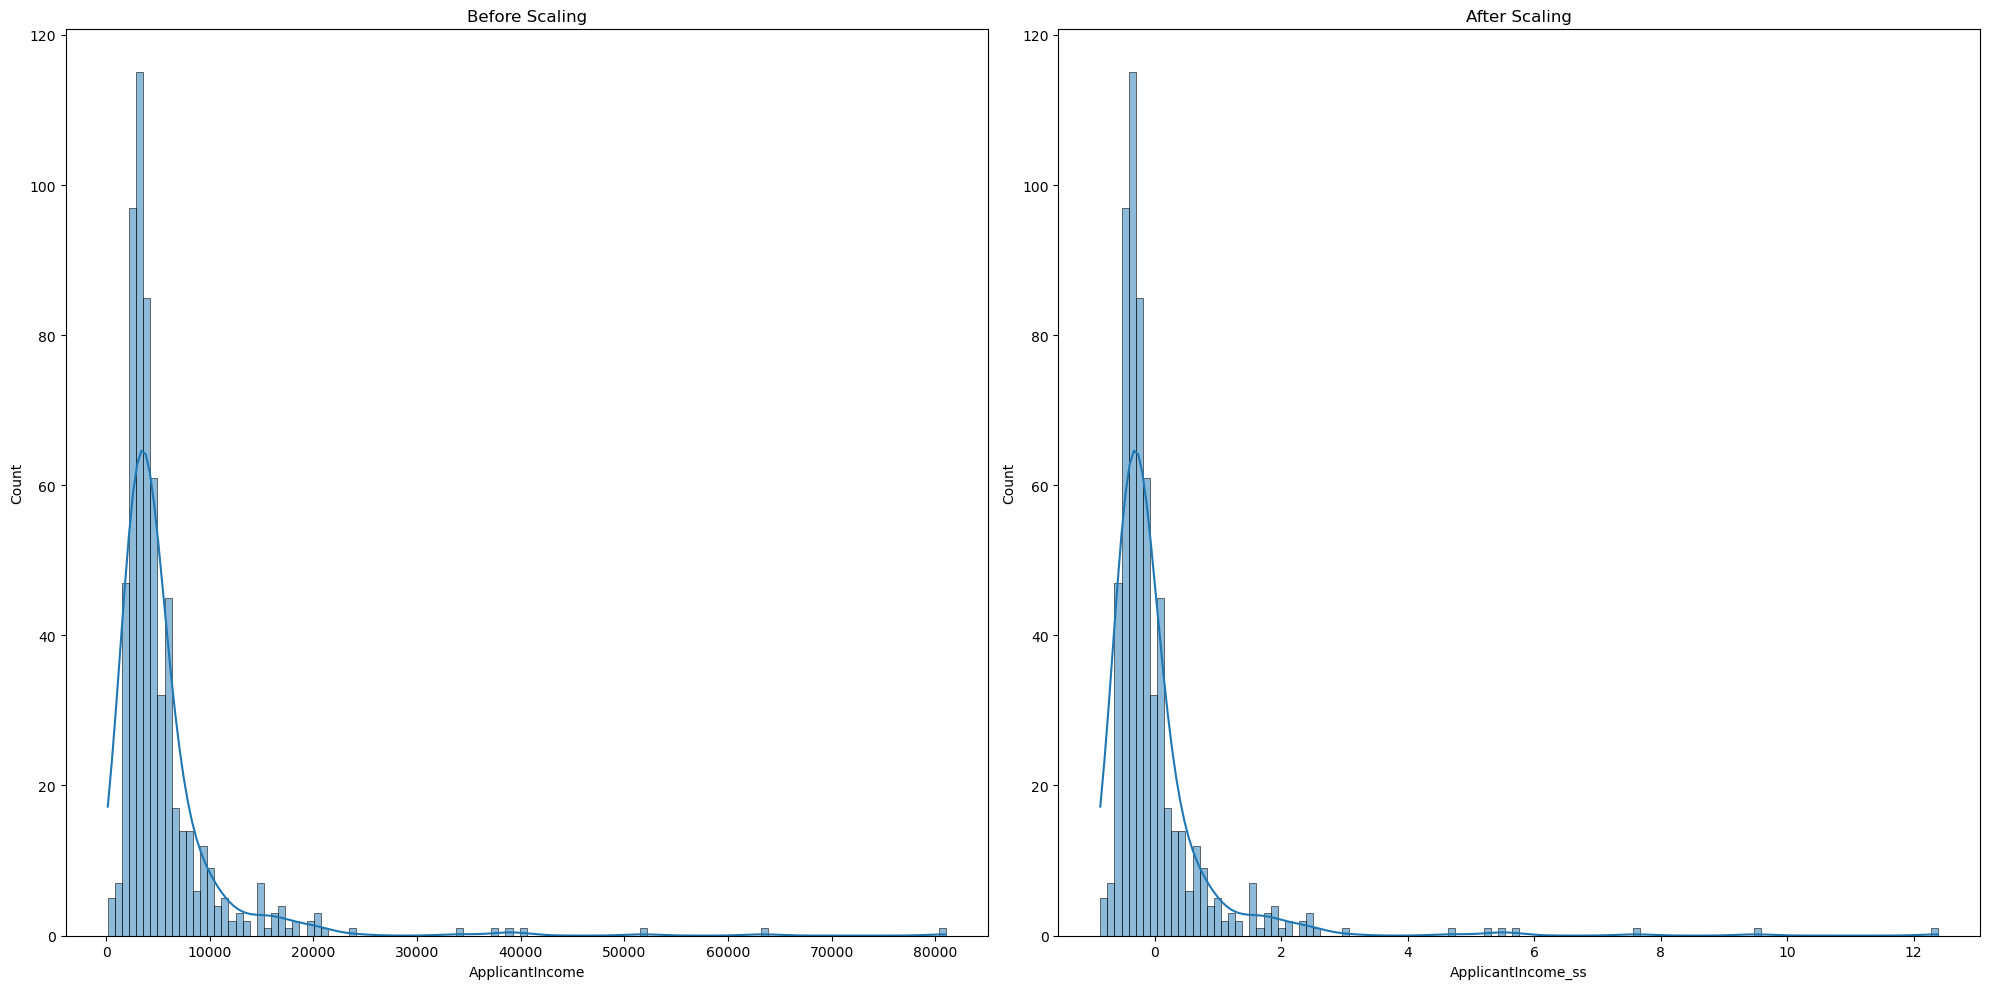

In [56]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Before Scaling")
sns.histplot(loan_data['ApplicantIncome'], kde=True)

plt.subplot(1,2,2)
plt.title('After Scaling')
sns.histplot(loan_data['ApplicantIncome_ss'], kde=True)

plt.tight_layout()
plt.show()

##### **Note :** The nature of the data remains same 

### 2. Normalization (Min-Max Scaling)

Normalization, also known as Min-Max Scaling, is a feature scaling technique that transforms data into a fixed range, typically [0, 1]. This method is particularly useful when features have different units or scales.

---

#### Process:

1. **Using `MinMaxScaler`**:
   - The `MinMaxScaler` from scikit-learn is applied to the `ApplicantIncome` column of the dataset.  
   - It scales each value using the formula:  
     $$ X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$  
     Where:  
     - $ X $: Original value,  
     - $ X_{\text{min}} $: Minimum value of the feature,  
     - $ X_{\text{max}} $: Maximum value of the feature,  
     - $ X' $: Scaled value in the range [0, 1].

2. **Visualization**:
   - The distribution of `ApplicantIncome` before and after normalization is visualized using histograms with kernel density estimation (KDE).  
   - The plot on the left shows the original data, which may have varying scales and ranges.  
   - The plot on the right shows the normalized data, which is now scaled to a fixed range [0, 1].

3. **Impact**:
   - Normalization compresses all feature values into a specified range, maintaining the original distribution shape.  
   - It is particularly useful for algorithms that rely on distance metrics, such as K-Nearest Neighbors (KNN) and Neural Networks.

#### Benefits:
- Normalized features are bounded, preventing large values from dominating the model.  
- It enhances the performance and convergence speed of machine learning algorithms sensitive to feature magnitudes.


In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
mms = MinMaxScaler()
arr = mms.fit_transform(loan_data[['ApplicantIncome']])

In [59]:
loan_data['ApplicantIncome_mms'] = arr
loan_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,ApplicantIncome_mms
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.070489
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.054830
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.035250


In [60]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss,ApplicantIncome_mms
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18,0.064978
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00,0.075560
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01,0.033735
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01,0.045300
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02,0.069821
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01,1.000000


##### **Note :** Mean of scaled data and variance/std are in the range [0,1] 

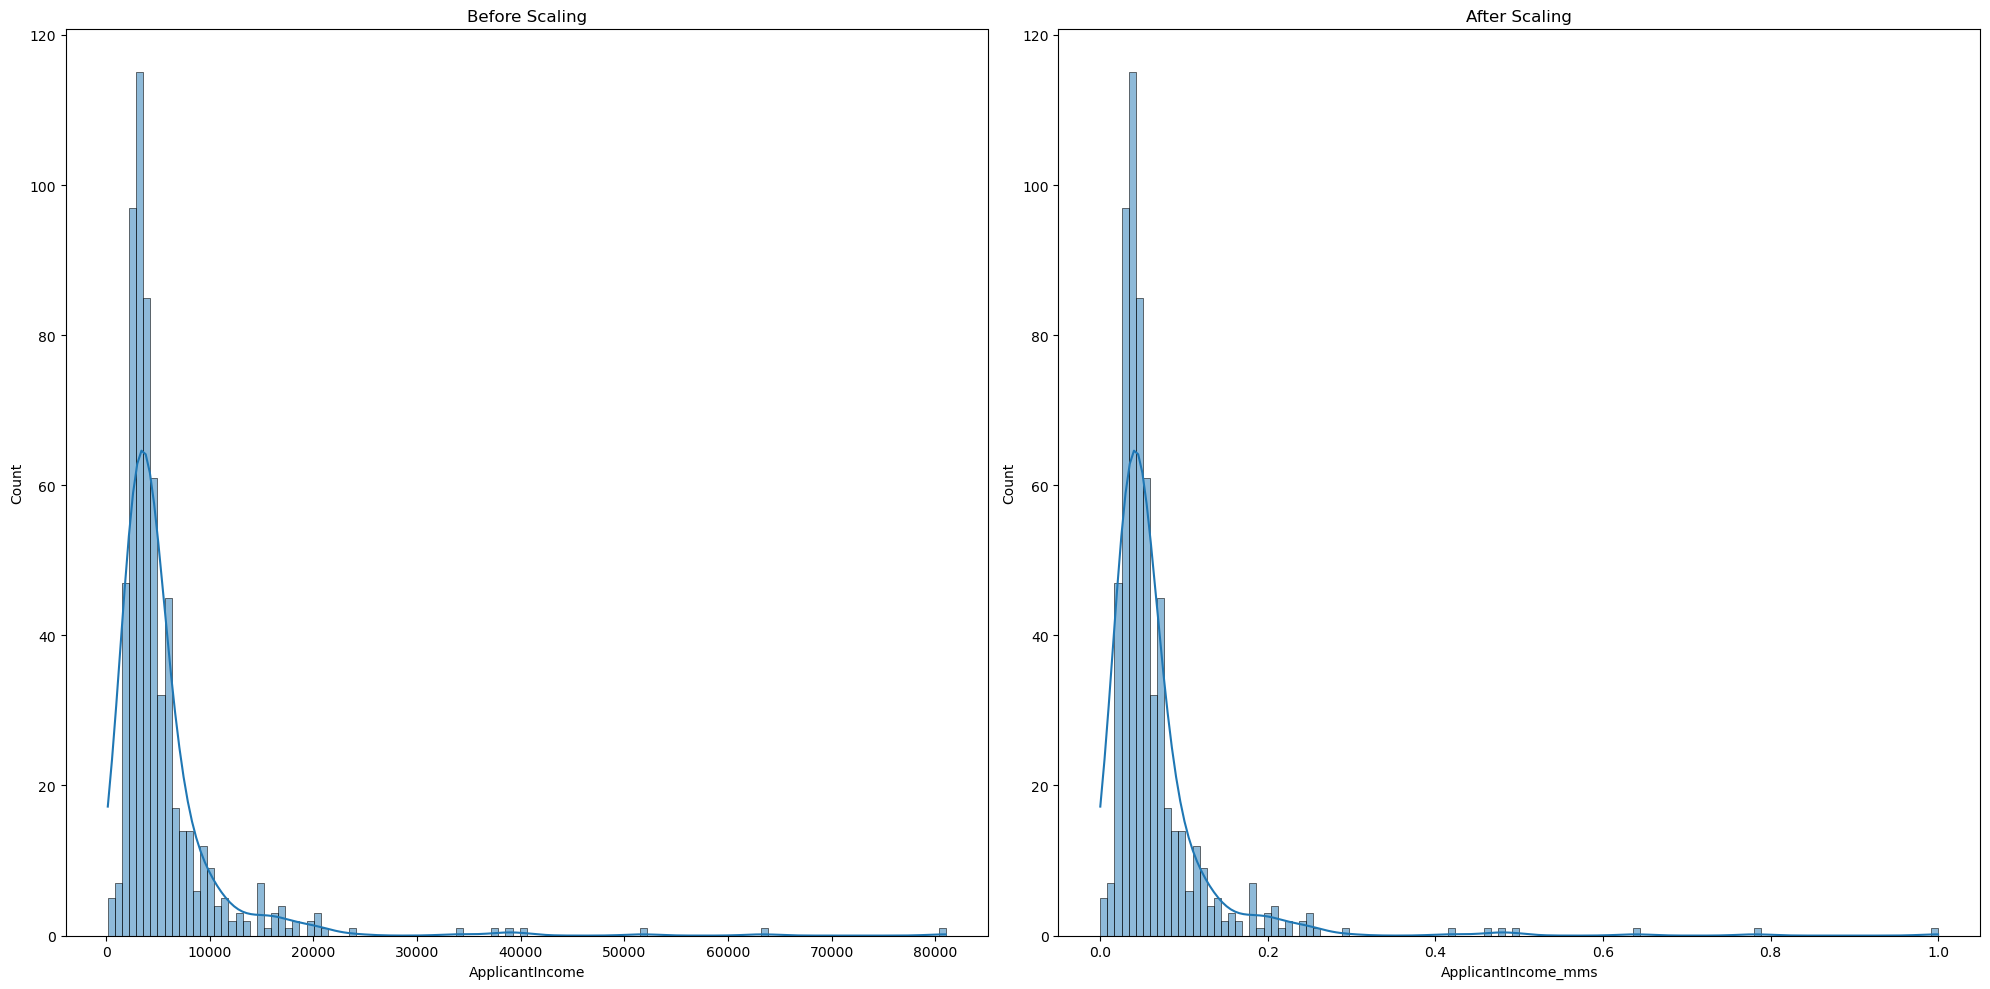

In [61]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Before Scaling')
sns.histplot(loan_data['ApplicantIncome'], kde=True)

plt.subplot(1,2,2)
plt.title('After Scaling')
sns.histplot(loan_data['ApplicantIncome_mms'], kde=True)

plt.tight_layout()
plt.show()


##### **Note :** The nature of the data remains same 

**Final Comparision**

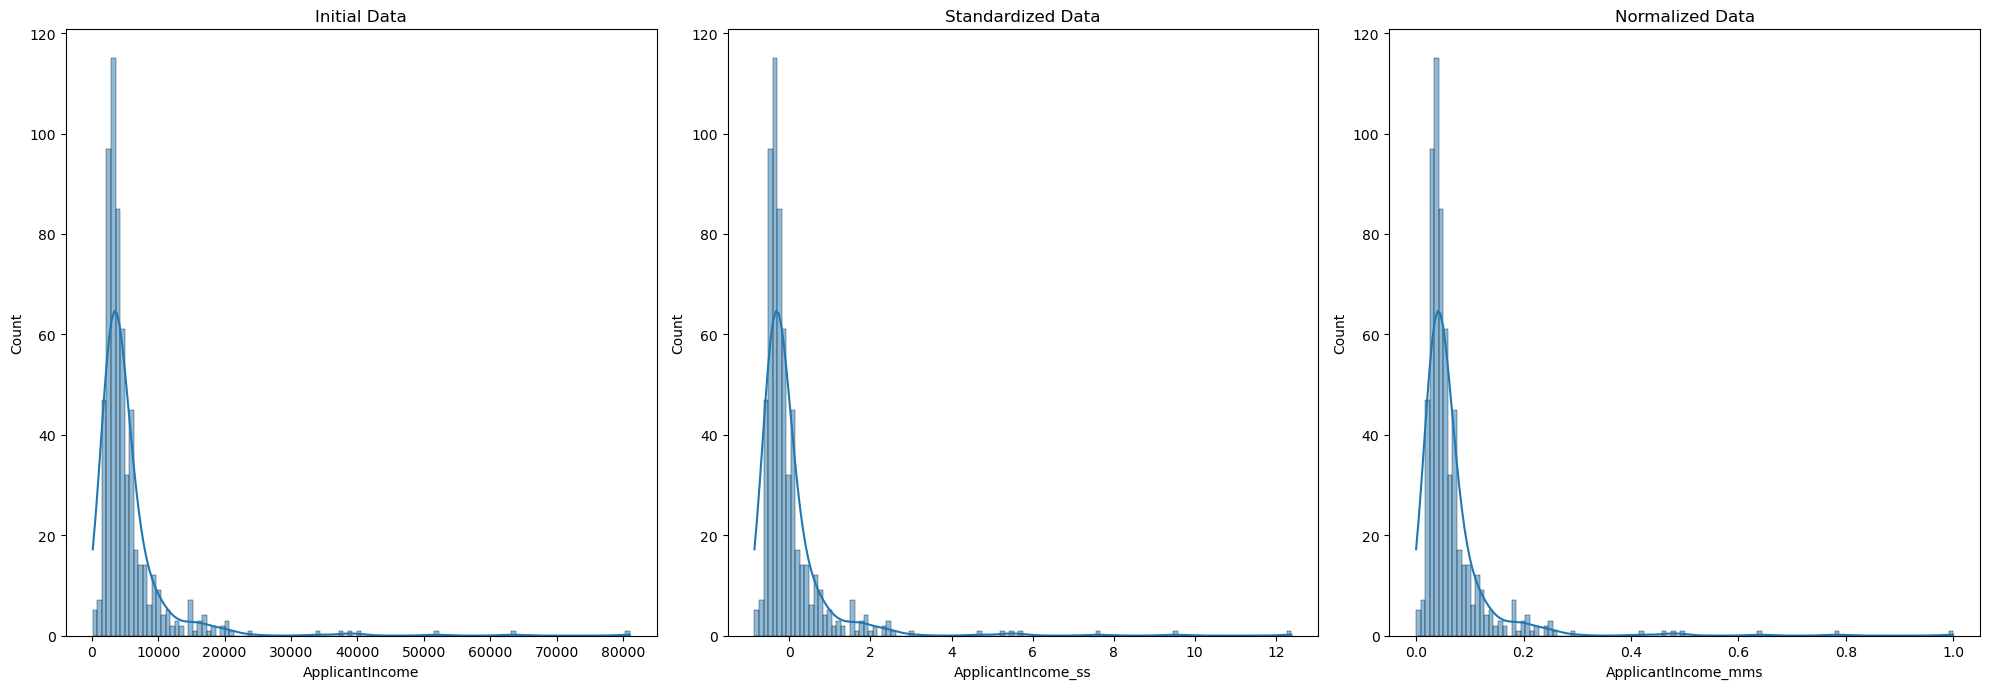

In [64]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.title('Initial Data')
sns.histplot(loan_data['ApplicantIncome'], kde=True)

plt.subplot(1,3,2)
plt.title('Standardized Data')
sns.histplot(loan_data['ApplicantIncome_ss'], kde=True)

plt.subplot(1,3,3)
plt.title('Normalized Data')
sns.histplot(loan_data['ApplicantIncome_mms'], kde=True)

plt.tight_layout()
plt.show()
